In [2]:
#manual loops to create matrix multiplication
a = [[1,2], [3,4]]
b = [[5,6],[7,8]]

result = [[sum(a*b for a,b in zip(row, col)) for col in zip(*b)] for row in a]
print(result)

[[19, 22], [43, 50]]


In [3]:
#using numpy to achieve the same results
import numpy as np

a = np.array([[1,2], [3,4]])
b = np.array([[5,6],[7,8]])

result = np.dot(a,b)
print(result)

[[19 22]
 [43 50]]


In [4]:
#timing both versions to compare speed and efficiency
import time
start = time.time()
# run pure-Python version
a = [[1,2], [3,4]]
b = [[5,6],[7,8]]

result = [[sum(a*b for a,b in zip(row, col)) for col in zip(*b)] for row in a]
print(result)
end = time.time()
print("Pure Python time:", end - start)

start = time.time()
# run NumPy version
a = np.array([[1,2], [3,4]])
b = np.array([[5,6],[7,8]])

result = np.dot(a,b)
print(result)
end = time.time()
print("NumPy time:", end - start)

[[19, 22], [43, 50]]
Pure Python time: 0.0006389617919921875
[[19 22]
 [43 50]]
NumPy time: 0.0006439685821533203


In [5]:
#now to experiment with what happens when the date grows

import numpy as np
import random
import time

# Size of the matrix
n = 100

# Pure-Python random matrices
A = [[random.randint(0, 100) for _ in range(n)] for _ in range(n)]
B = [[random.randint(0, 100) for _ in range(n)] for _ in range(n)]

start = time.time()
result_py = [[sum(a*b for a, b in zip(row, col)) for col in zip(*B)] for row in A]
end = time.time()
print("Pure Python time:", end - start)

A_np = np.array(A)
B_np = np.array(B)

start = time.time()
result_np = np.dot(A_np, B_np)
end = time.time()
print("NumPy time:", end - start)

Pure Python time: 0.06675887107849121
NumPy time: 0.00041985511779785156


In [6]:
python_time = 0.06675887107849121
numpy_time = 0.00041985511779785156
print(f"Speed-up: {python_time / numpy_time:.1f}× faster with NumPy")

Speed-up: 159.0× faster with NumPy


In [7]:
#numpy is significantly faster over large datasets, now lets confirm the math is equal
print(np.allclose(result_np, np.array(result_py)))

True


In [8]:
#True, both results are numerically identical.

----

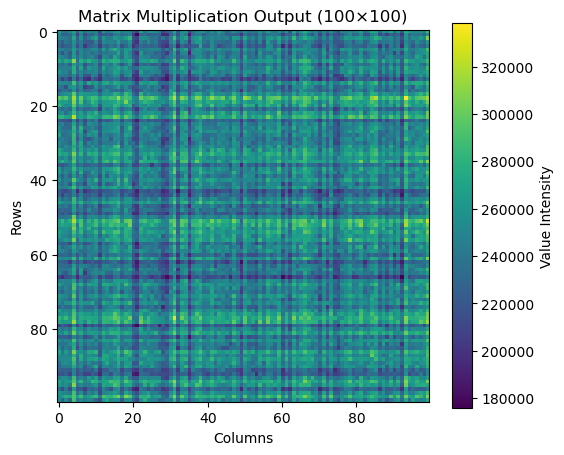

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(result_np, cmap='viridis')
plt.title("Matrix Multiplication Output (100×100)")
plt.colorbar(label='Value Intensity')
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

🧩 What you’re actually looking at

That image is a heatmap — a color-coded view of the numerical values inside your resulting 100×100 matrix.

Each cell in the image represents one number in the matrix — the product of one row from Matrix A and one column from Matrix B.
	•	X-axis (“Columns”) → represents the column index of Matrix B.
	•	Y-axis (“Rows”) → represents the row index of Matrix A.
	•	Color intensity → represents how large the resulting value is at that cell (the product of that row×column combination).
	•	Brighter colors (yellows) = larger numbers.
	•	Darker colors (purples) = smaller numbers.

🧠 How to interpret what you’re seeing

Your random matrices A and B contain integers from 0–100. When multiplied, each result cell becomes the sum of 100 individual products, so the results can reach values in the hundreds of thousands.
	•	The grid-like pattern is natural — it comes from the randomness of both matrices and how some rows/columns happen to overlap with higher or lower average values.
	•	There’s no meaningful geometric pattern here yet — since the data isn’t structured — but that’s actually what makes it useful:
→ It shows that you can visualize numerical relationships even when the data isn’t human-readable.

🧩 How this becomes meaningful later

Once you start applying the same math to real data — say, pixel values of an image, financial correlations, or feature weights in a neural network —
this kind of heatmap becomes a map of relationships:
	•	In images: each block might represent brightness or texture intensity.
	•	In data analysis: it might show which variables influence others most strongly.
	•	In machine learning: it could reveal what a model “sees” when comparing inputs.

🗣️ How you’d explain it simply to a client or stakeholder

“Each cell in this grid shows how strongly one row of numbers interacts with one column of numbers. The brighter the color, the larger the result. In real-world datasets, this kind of chart helps us see patterns and relationships that would be invisible if we just looked at the numbers.”

----

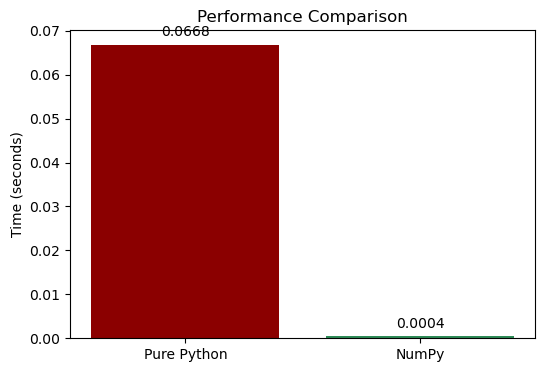

In [10]:
methods = ['Pure Python', 'NumPy']
times = [python_time, numpy_time]

plt.figure(figsize=(6, 4))
plt.bar(methods, times, color=['darkred', 'seagreen'])
plt.title("Performance Comparison")
plt.ylabel("Time (seconds)")
for i, t in enumerate(times):
    plt.text(i, t + 0.002, f"{t:.4f}", ha='center', fontsize=10)
plt.show()

This one is pretty straightforward and informs that the numpy method is significantly faster and the clear choice when planning for scale

----

### Reflections
- NumPy delivered ~159× speed-up compared to loops.
- Pure Python helped me understand matrix math step by step.
- NumPy makes the same math intuitive, fast, and clean to read.
- Like drilling jiu-jitsu, repetition turns complex techniques into instinct.